## Music Trends During Election Cycles

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df= pd.read_csv('../data/playlist_with_genres.csv')

In [3]:
df.head()

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,6naxalmIoLFWR0siv8dnQQ,Oops!...I Did It Again,81,Oops!... I Did It Again,26dSoYclwsYLMAKD3tpOr4,Britney Spears,"['dance pop', 'pop']",81,...,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,211160,4,"dance pop, pop"
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,83,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",79,...,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,167067,4,"alternative metal, modern rock, pop punk, punk..."
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,66,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",62,...,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,250547,4,"contemporary country, country, country dawn, c..."
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,0v1XpBHnsbkCn7iJ9Ucr1l,It's My Life,81,Crush,58lV9VcRSjABbAbfWS6skp,Bon Jovi,"['glam metal', 'rock']",79,...,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,224493,4,"glam metal, rock"
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,75,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",70,...,0,0.0479,0.0310,0.001200,0.0821,0.861,172.638,200400,4,"boy band, dance pop, pop"


In [4]:
# Check for missing values
print(df.isnull().sum())

playlist_url          0
year                  0
track_id              0
track_name            0
track_popularity      0
album                 0
artist_id             0
artist_name           0
artist_genres         0
artist_popularity     0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_ms           0
time_signature        0
genre                17
dtype: int64


In [5]:
# Fill or drop missing values as appropriate
df.fillna(0, inplace=True)

In [6]:
# Filter the dataset by the specified years
filtered_years = [2015, 2016, 2019, 2020, 2023]
filtered_df = df[df['year'].isin(filtered_years)]

# Select only the relevant columns: 'year', 'track_name', 'track_popularity', 'danceability', 'loudness', 'tempo', 'genre'
selected_columns = ['year', 'track_name', 'track_popularity', 'artist_name', 'danceability', 'loudness', 'tempo', 'genre']
filtered_df = filtered_df[selected_columns].rename(columns={'track_name': 'title', 'track_popularity': 'popularity', 'artist_name': 'artist'})

In [7]:
# Clean up the genre column by picking only the first genre listed
filtered_df['genre'] = filtered_df['genre'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# Display the cleaned DataFrame
filtered_df.head()

,year,title,popularity,artist,danceability,loudness,tempo,genre
1500,2015,Uptown Funk (feat. Bruno Mars),85,Mark Ronson,0.856,-7.223,114.988,pop soul
1501,2015,Thinking out Loud,82,Ed Sheeran,0.781,-6.061,78.998,pop
1502,2015,See You Again (feat. Charlie Puth),84,Wiz Khalifa,0.689,-7.503,80.025,hip hop
1503,2015,What Do You Mean?,81,Justin Bieber,0.845,-8.118,125.020,canadian pop
1504,2015,Lean On,77,Major Lazer,0.723,-3.081,98.007,dance pop


In [8]:
filtered_df['genre'].value_counts()

genre
pop                           102
dance pop                      50
canadian pop                   17
reggaeton                      16
canadian hip hop               15
                             ... 
melodic drill                   1
europop                         1
rap canario                     1
new jersey underground rap      1
australian hip hop              1
Name: count, Length: 115, dtype: int64

/tmp/ipykernel_9675/3818988750.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_genres_by_year = genre_counts_by_year.groupby('year', group_keys=False).apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)
/tmp/ipykernel_9675/3818988750.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='genre', x='count', data=data_year, palette='viridis')
/tmp/ipykernel_9675/3818988750.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `lege

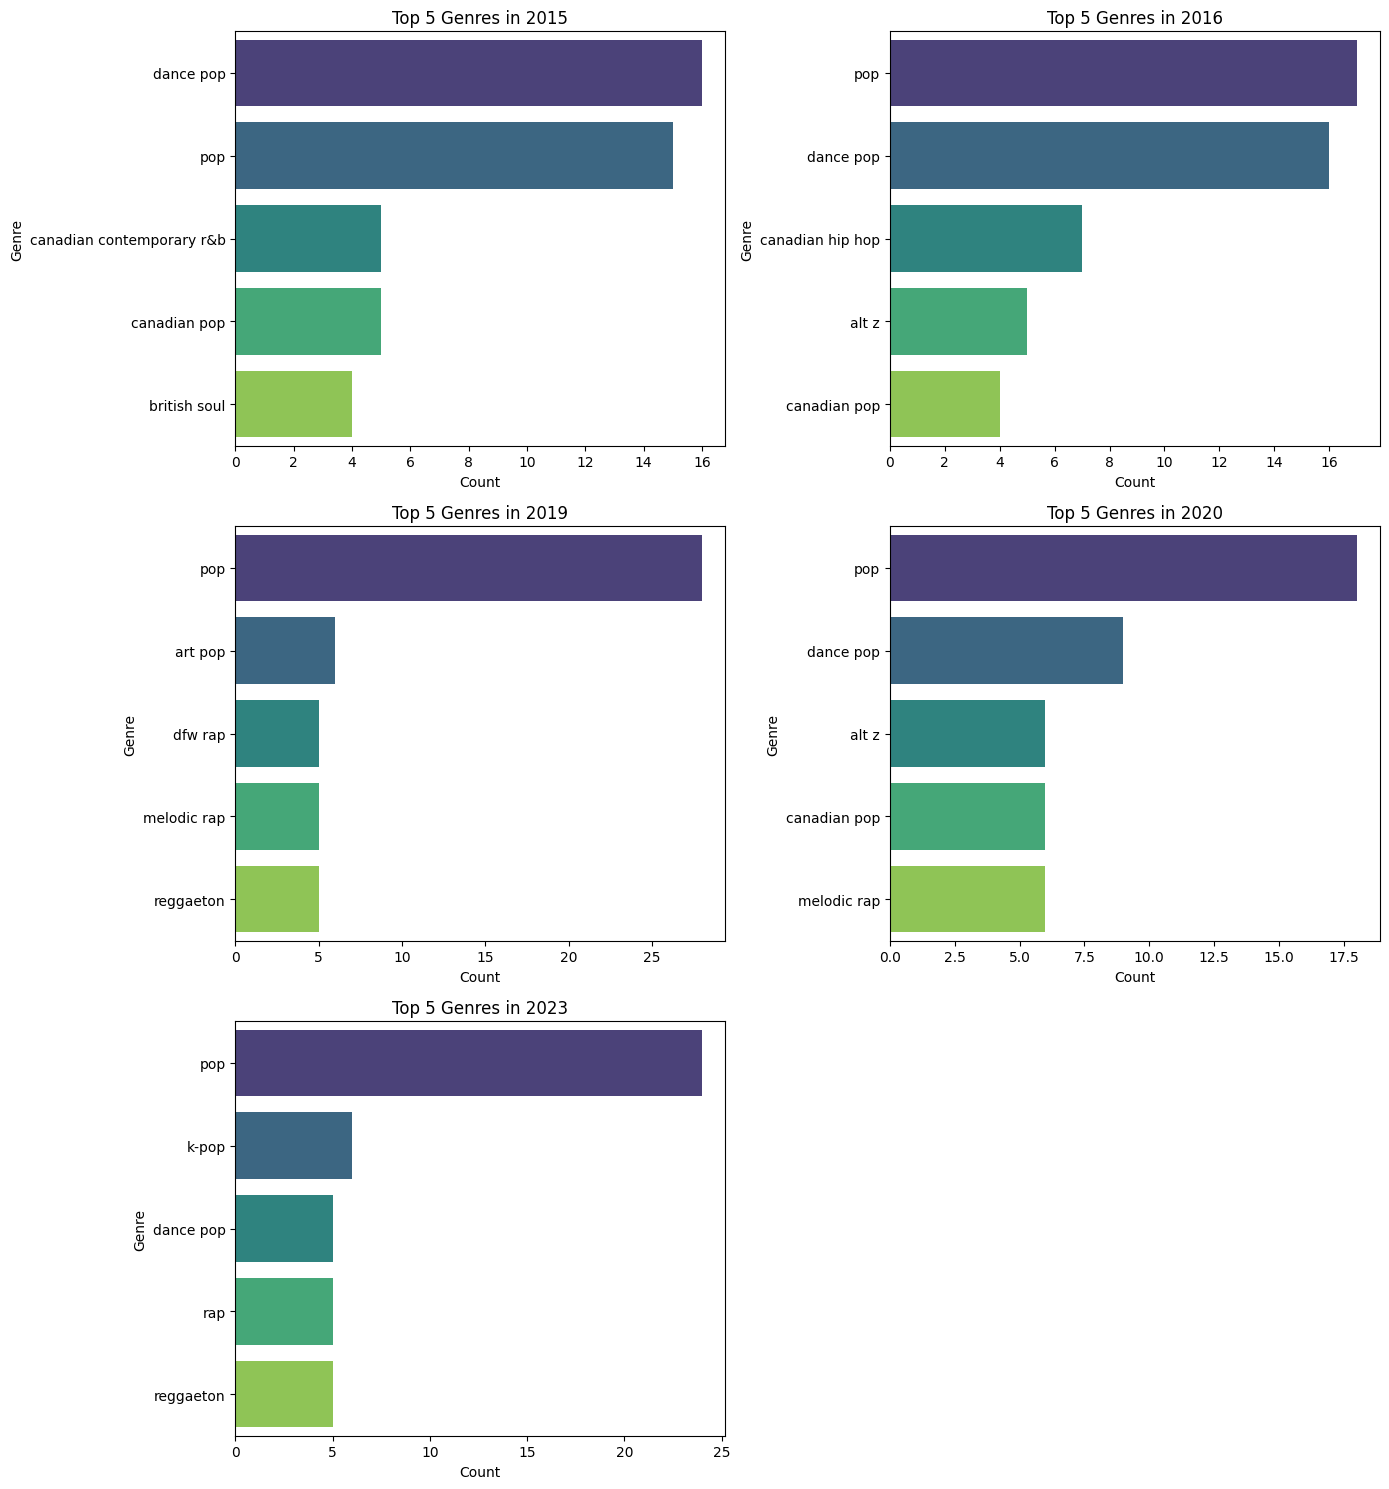

In [9]:
# Explode the genre list into separate rows
df_genres = filtered_df.explode('genre')

# Count the occurrences of each genre by year
genre_counts_by_year = df_genres.groupby(['year', 'genre']).size().reset_index(name='count')

# Get the top 5 genres for each year
top_5_genres_by_year = genre_counts_by_year.groupby('year', group_keys=False).apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Extract unique years
years = top_5_genres_by_year['year'].unique()
num_years = len(years)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_years + num_cols - 1) // num_cols  # Calculate rows needed

plt.figure(figsize=(14, 5 * num_rows))

for i, year in enumerate(years):
    plt.subplot(num_rows, num_cols, i+1)
    data_year = top_5_genres_by_year[top_5_genres_by_year['year'] == year]
    sns.barplot(y='genre', x='count', data=data_year, palette='viridis')
    plt.title(f'Top 5 Genres in {year}')
    plt.xlabel('Count')
    plt.ylabel('Genre')
    plt.tight_layout()

plt.show()

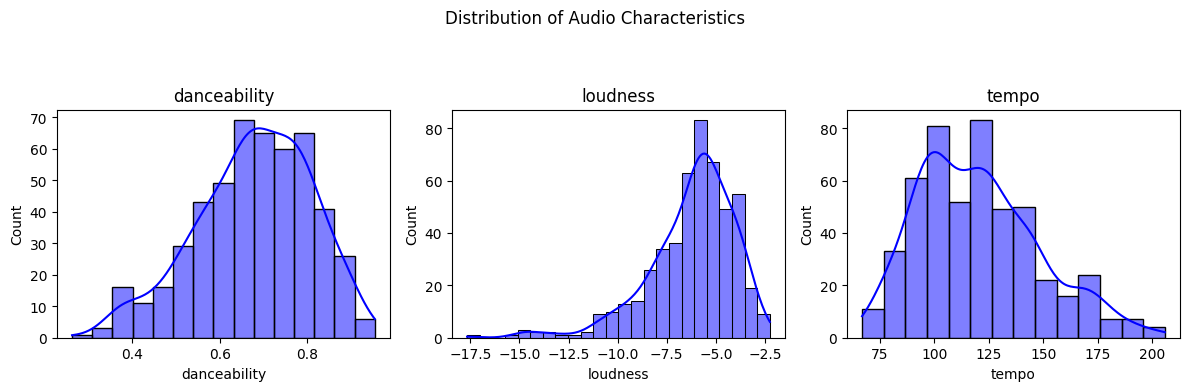

In [63]:
characteristics = ['danceability', 'loudness', 'tempo']

# Create histograms for all characteristics in subplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(characteristics):
    plt.subplot(2, 3, i+1)
    sns.histplot(filtered_df[col], kde=True, color='blue')
    plt.title(col)
plt.suptitle('Distribution of Audio Characteristics', y=1.05)  # Adding the overall title
plt.tight_layout()
plt.show()

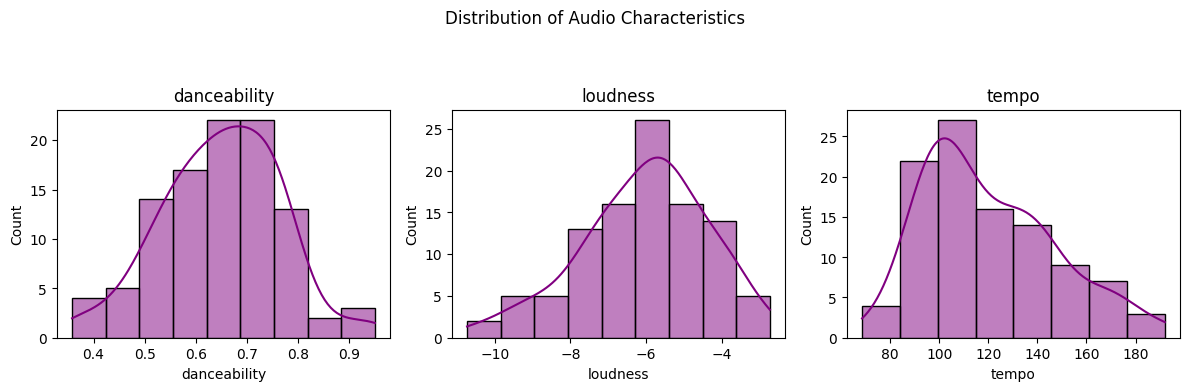

In [62]:
# Create histograms for all characteristics in subplots
plt.figure(figsize=(12, 6))

filtered_by_pop = filtered_df[filtered_df['genre'].isin(['pop'])]

for i, col in enumerate(characteristics):
    plt.subplot(2, 3, i+1)
    sns.histplot(filtered_by_pop[col], kde=True, color='purple')
    plt.title(col)
plt.suptitle('Distribution of Audio Characteristics', y=1.05)  # Adding the overall title
plt.tight_layout()
plt.show()

In [11]:
# Filter the dataset by the specified years
filtered_years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
f_df = df[df['year'].isin(filtered_years)]

# Select only the relevant columns: 'year', 'track_name', 'track_popularity', 'danceability', 'loudness', 'tempo', 'genre'
selected_columns = ['year', 'track_name', 'track_popularity', 'artist_name', 'danceability', 'loudness', 'tempo', 'genre']
f_df = f_df[selected_columns].rename(columns={'track_name': 'title', 'track_popularity': 'popularity', 'artist_name': 'artist'})

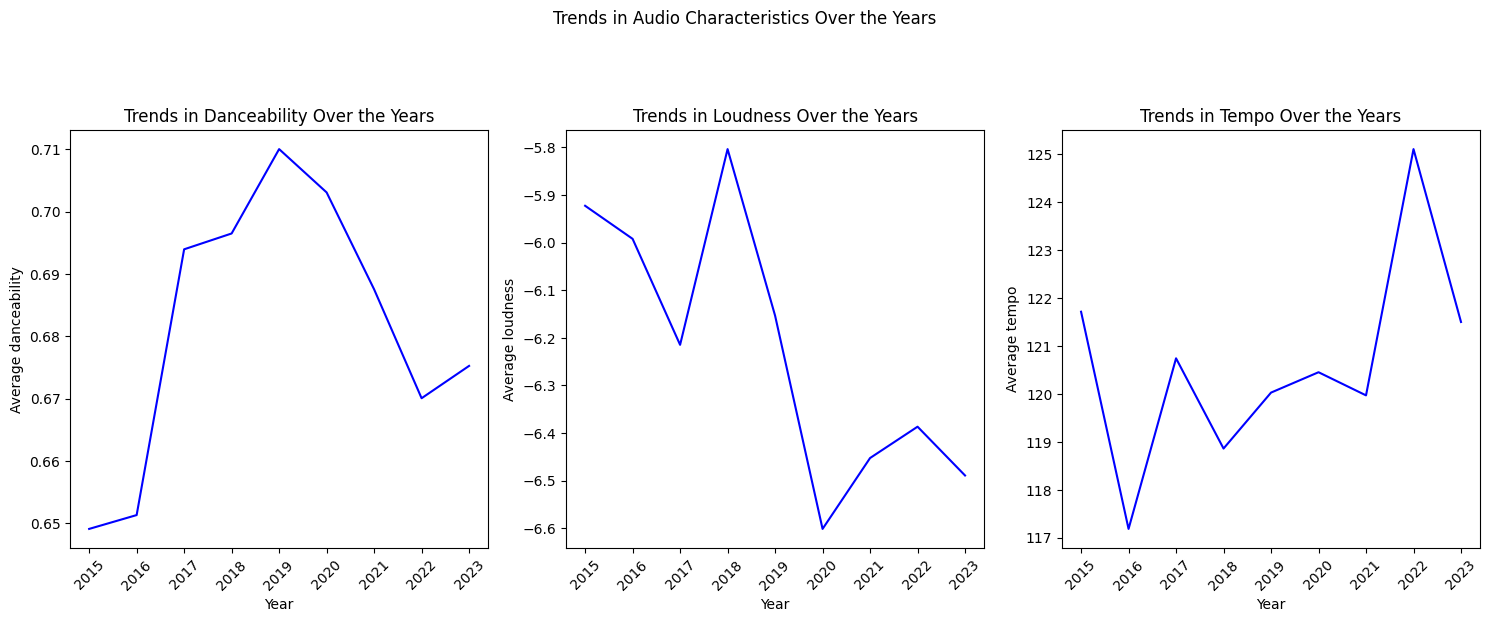

In [12]:
# Create a figure for subplots
plt.figure(figsize=(15, 10))

for i, col in enumerate(characteristics):
    # Calculate average for each characteristic by year
    average_by_year = f_df.groupby('year')[col].mean()
    
    # Create subplot
    plt.subplot(2, 3, i+1)
    sns.lineplot(x=average_by_year.index, y=average_by_year.values, color='blue')
    plt.xlabel('Year')
    plt.ylabel(f'Average {col}')
    plt.title(f'Trends in {col.replace("_", " ").title()} Over the Years')
    plt.xticks(rotation=45)

# Add a suptitle for the entire figure
plt.suptitle('Trends in Audio Characteristics Over the Years', y=1.05)
plt.tight_layout()
plt.show()

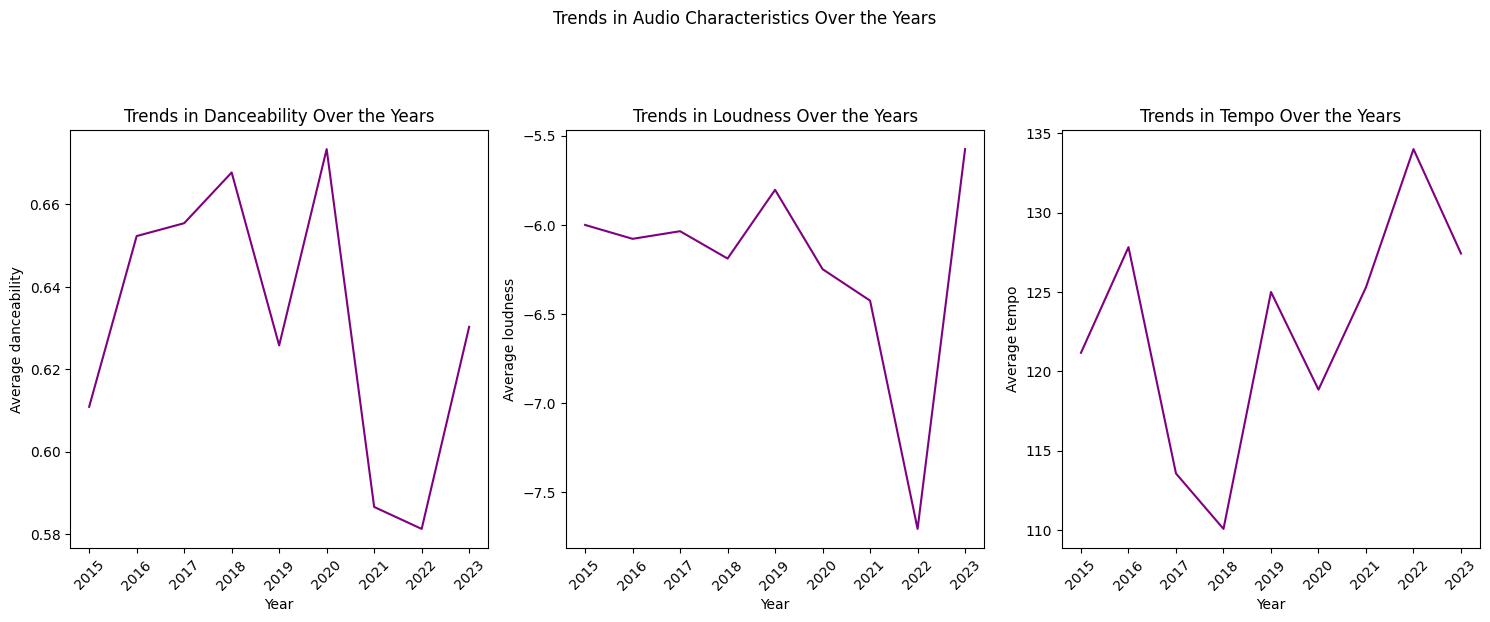

In [64]:
# Create a figure for subplots
plt.figure(figsize=(15, 10))

for i, col in enumerate(characteristics):
    # Calculate average for each characteristic by year
    average_by_year_and_pop = f_df[f_df['genre'].isin(['pop'])].groupby('year')[col].mean()
    
    # Create subplot
    plt.subplot(2, 3, i+1)
    sns.lineplot(x=average_by_year_and_pop.index, y=average_by_year_and_pop.values, color='purple')
    plt.xlabel('Year')
    plt.ylabel(f'Average {col}')
    plt.title(f'Trends in {col.replace("_", " ").title()} Over the Years')
    plt.xticks(rotation=45)

# Add a suptitle for the entire figure
plt.suptitle('Trends in Audio Characteristics Over the Years', y=1.05)
plt.tight_layout()
plt.show()

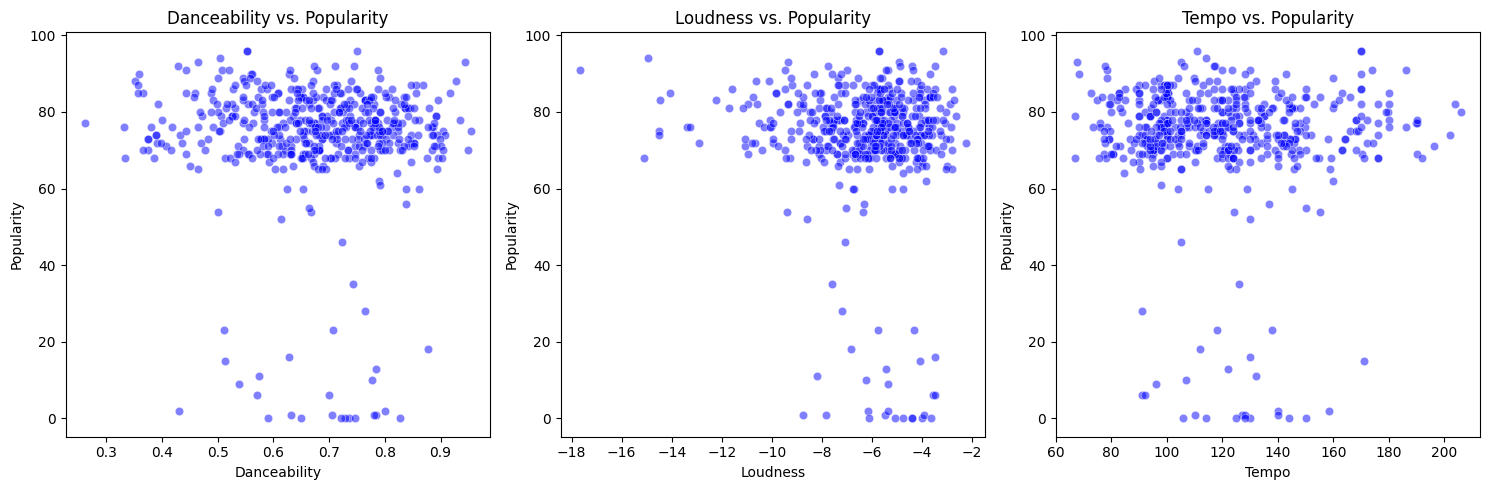

In [14]:
# Create a figure for subplots
plt.figure(figsize=(15, 5))

# Create scatter plots for each audio feature
for i, feature in enumerate(characteristics, start=1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=filtered_df[feature], y=filtered_df['popularity'], color='blue', alpha=0.5)
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Popularity')
    plt.title(f'{feature.replace("_", " ").title()} vs. Popularity')

plt.tight_layout()
plt.show()

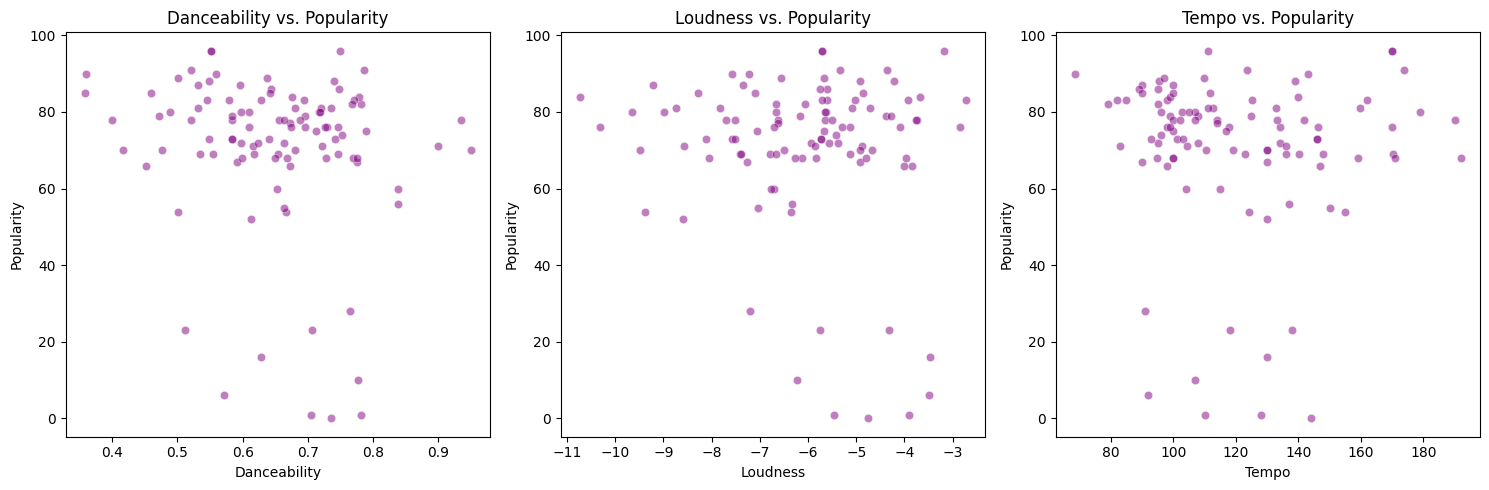

In [65]:
# Create a figure for subplots
plt.figure(figsize=(15, 5))

filtered_by_pop = filtered_df[filtered_df['genre'].isin(['pop'])]

# Create scatter plots for each audio feature
for i, feature in enumerate(characteristics, start=1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=filtered_by_pop[feature], y=filtered_by_pop['popularity'], color='purple', alpha=0.5)
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Popularity')
    plt.title(f'{feature.replace("_", " ").title()} vs. Popularity')

plt.tight_layout()
plt.show()

